In [0]:
import pyspark.sql.functions as F

## Reading the parquet file with result

In [0]:
data = spark.read.parquet("/mnt/spicyfood-ai/tweetsnew.parquet")
data.display()


created_at,tweet_id,tweet,likes,retweet_count,source,user_id,user_name,user_screen_name,user_description,user_join_date,user_followers_count,user_location,lat,long,city,Country,continent,state,state_code,collected_at,Candidate,tokenized_tweet,polarity,subjectivity,classification
2020-10-15 00:00:01,1.31652925E18,#Elecciones2020 | En #Florida: #JoeBiden dice que #DonaldTrump solo se preocupa por él mismo. El demócrata fue anfitrión de encuentros de electores en #PembrokePines y #Miramar. Clic AQUÍ ⬇️⬇️⬇️ ⠀ 🌐https://t.co/qhIWpIUXsT _ #ElSolLatino #yobrilloconelsol https://t.co/6FlCBWf1Mi,0.0,0.0,TweetDeck,3.60666528E8,El Sol Latino News,elsollatinonews,🌐 Noticias de interés para latinos de la costa este de #EEUU ⠀⏹️ Facebook e Instagram ⠀🏙️ Philadelphia: /elsollatinonewspaper ⠀🌅 Miami: /elsollatinonewsmiami,2011-08-23 15:33:45,1860.0,"Philadelphia, PA / Miami, FL",25.77427,-80.19366,null,US,North America,Florida,FL,2020-10-21 00:00:00,TRUMP,elecciones en florida joebiden dice que donaldtrump solo se preocupa por l mismo el dem crata fue anfitri n de encuentros de electores en pembrokepines miramar clic aqu elsollatino yobrilloconelsol,0.0,0.0,neutral
2020-10-15 00:00:01,1.31652925E18,"Usa 2020, Trump contro Facebook e Twitter: coprono Biden #donaldtrump https://t.co/6ceURhe1VP https://t.co/94jidLjoON",26.0,9.0,Social Mediaset,3.31617632E8,Tgcom24,MediasetTgcom24,Profilo ufficiale di Tgcom24: tutte le notizie sul sito https://t.co/sC5iMbymSN e sul canale 51 del digitale terrestre,2011-07-08 13:12:20,1067661.0,null,null,null,null,null,null,null,null,2020-10-21 00:00:00.373216530,TRUMP,usa trump contro facebook e twitter coprono biden donaldtrump,0.0,0.0,neutral
2020-10-15 00:00:02,1.31652925E18,"#Trump: As a student I used to hear for years, for ten years, I heard China! In 2019! And we have 1.5 and they don't know how many we have and I asked them how many do we have and they said 'sir we don't know.' But we have millions. Like 300 million. Um. What?",2.0,1.0,Twitter Web App,8436472.0,snarke,snarke,"Will mock for food! Freelance writer, blogger, commentator. Civics nerd. She/Her",2007-08-26 05:56:11,1185.0,Portland,45.52025,-122.674194,Portland,US,North America,Oregon,OR,2020-10-21 00:00:00.746433060,TRUMP,trump student used hear years ten years heard china know many asked many said sir know millions like million um,0.3333333333333333,0.3333333333333333,positive
2020-10-15 00:00:02,1.31652925E18,2 hours since last tweet from #Trump! Maybe he is VERY busy. Tremendously busy.,0.0,0.0,Trumpytweeter,8.2835557E17,Trumpytweeter,trumpytweeter,"If he doesn't tweet for some time, should we be worried?",2017-02-05 21:32:17,32.0,null,null,null,null,null,null,null,null,2020-10-21 00:00:01.119649591,TRUMP,hours since last tweet trump maybe busy tremendously busy,0.06666666666666667,0.2222222222222222,positive
2020-10-15 00:00:08,1.31652925E18,You get a tie! And you get a tie! #Trump ‘s rally #Iowa https://t.co/jJalUUmh5D,4.0,3.0,Twitter for iPhone,4.74138E7,Rana Abtar - رنا أبتر,Ranaabtar,"Washington Correspondent, Lebanese-American ,covering Capitol Hill &DC politics in Arabic for 15+yrs. Mom of identical twins. Beach, chocolate & gym lover.",2009-06-15 19:05:35,5393.0,Washington DC,38.894993,-77.03656,Washington,US,North America,District of Columbia,DC,2020-10-21 00:00:01.492866121,TRUMP,get tie get tie trump rally iowa,0.0,0.0,neutral
2020-10-15 00:00:17,1.31652925E18,@CLady62 Her 15 minutes were over long time ago. Omarosa never represented the black community! #TheReidOut She cried to #Trump begging for a job!,2.0,0.0,Twitter for Android,1.13841613E9,Farris Flagg,FarrisFlagg,#BidenHarris2020 #JoeBiden2020 #KamalaHarrisForVP #IStandWithEllen @KamalaHarris @JoeBiden #TeamJoe #KHive #BidenHarris2020ToSaveAmerica,2013-02-01 01:37:38,2363.0,"Perris,California",33.78252,-117.228645,null,US,North America,California,CA,2020-10-21 00:00:01.866082651,TRUMP,clady minutes long time ago omarosa never represented black community thereidout cried trump

In [0]:
data.printSchema()

root
-- created_at: string (nullable = true)
-- tweet_id: float (nullable = true)
-- tweet: string (nullable = true)
-- likes: float (nullable = true)
-- retweet_count: float (nullable = true)
-- source: string (nullable = true)
-- user_id: float (nullable = true)
-- user_name: string (nullable = true)
-- user_screen_name: string (nullable = true)
-- user_description: string (nullable = true)
-- user_join_date: string (nullable = true)
-- user_followers_count: float (nullable = true)
-- user_location: string (nullable = true)
-- lat: float (nullable = true)
-- long: float (nullable = true)
-- city: string (nullable = true)
-- Country: string (nullable = true)
-- continent: string (nullable = true)
-- state: string (nullable = true)
-- state_code: string (nullable = true)
-- collected_at: string (nullable = true)
-- Candidate: string (nullable = true)
-- tokenized_tweet: string (nullable = true)
-- polarity: string (nullable = true)
-- subjectivity: string (nullable = true)
-- classification: string (nullable = true)

## Exploratory Data Analysis

In [0]:
## The number of tweets
data.groupBy('Candidate').count()\
                          .withColumnRenamed("count","Number of Data")\
                          .display()

Candidate,Number of Data
TRUMP,970919
BIDEN,776886


In [0]:
## Comparrsion for the number of tweets
data.groupby('Candidate').agg(F.expr('count(tweet)')\
                              .alias('Number of Tweets'))\
                              .display()

Candidate,Number of Tweets
TRUMP,970919
BIDEN,776886


In [0]:
# The comparison of likes for each candidate
data.groupby('Candidate').agg(F.expr('count(likes)')\
                              .alias('Number of Likes'))\
                              .display()

Candidate,Number of Likes
TRUMP,970919
BIDEN,776886


In [0]:
# The number of Data country wise
data.groupby('country').count()\
                        .withColumnRenamed('count','Number of Data')\
                        .dropna()\
                        .sort(F.desc('Number of Data')).display()

country,Number of Data
US,394400
United Kingdom,58051
India,40091
Germany,35379
France,35299
Canada,27805
Italy,20076
Australia,14899
Mexico,10903
Turkey,10368


In [0]:
#Number of sentiment classified tweets
data.groupby('classification').count()\
     .withColumnRenamed('count','Number of Tweets')\
     .display()

classification,Number of Tweets
positive,493917
neutral,993753
negative,260135


In [0]:
data.groupby('classification','Candidate').count()\
                              .display()

classification,Candidate,count
neutral,TRUMP,545037
positive,TRUMP,262676
negative,TRUMP,163206
negative,BIDEN,96929
positive,BIDEN,231241
neutral,BIDEN,448716


## Observations

In [0]:

import pandas as pd 
pandas_df = data.toPandas()

In [0]:
df = pandas_df.drop(["tweet_id","created_at","retweet_count","source", "user_id", "user_name", "user_screen_name","user_description", "user_join_date", "user_followers_count","user_location", "lat", "long", "city", "state_code", "collected_at","continent", "polarity", "subjectivity","tokenized_tweet"],axis = 1)

In [0]:
df = df.sample(frac=1).reset_index(drop=True)
df

Out[20]:

,tweet,likes,Country,state,Candidate,classification
0,La #NATO spera con #Biden di ritrovare la guid...,6.0,Italy,Lombardy,TRUMP,neutral
1,Anyone else love for this to happen?\n#Trump #...,14.0,United Kingdom,England,BIDEN,positive
2,"Because elections have consequences, and elect...",0.0,None,None,TRUMP,negative
3,#LilWayne with a message after his meeting wit...,0.0,None,None,TRUMP,neutral
4,"#Trump steht für #Sozialdarwinismus, #Rassismu...",0.0,None,None,TRUMP,neutral
...,...,...,...,...,...,...
1747800,Die Medien müssten mit klagen und Schadensersa...,0.0,United Kingdom,England,TRUMP,neutral
1747801,#elezioniUsa2020: #Biden cancella #Trump.\n#Ma...,0.0,None,None,BIDEN,neutral
1747802,1/ ALERT:PROOF @JoeBiden a LAME DUCK(IF wins)o...,1.0,US,None,TRUMP,positive
1747803,#nba #usa #trump #AppleEvent #JoeBiden #vote #...,0.0,None,None,BIDEN,positive


<command-4047411038825830>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 X = df[df['Country'] == 'US'][df['classification'] == 'negative'].groupby(['state','Candidate','classification'])['tweet'].count().reset_index()

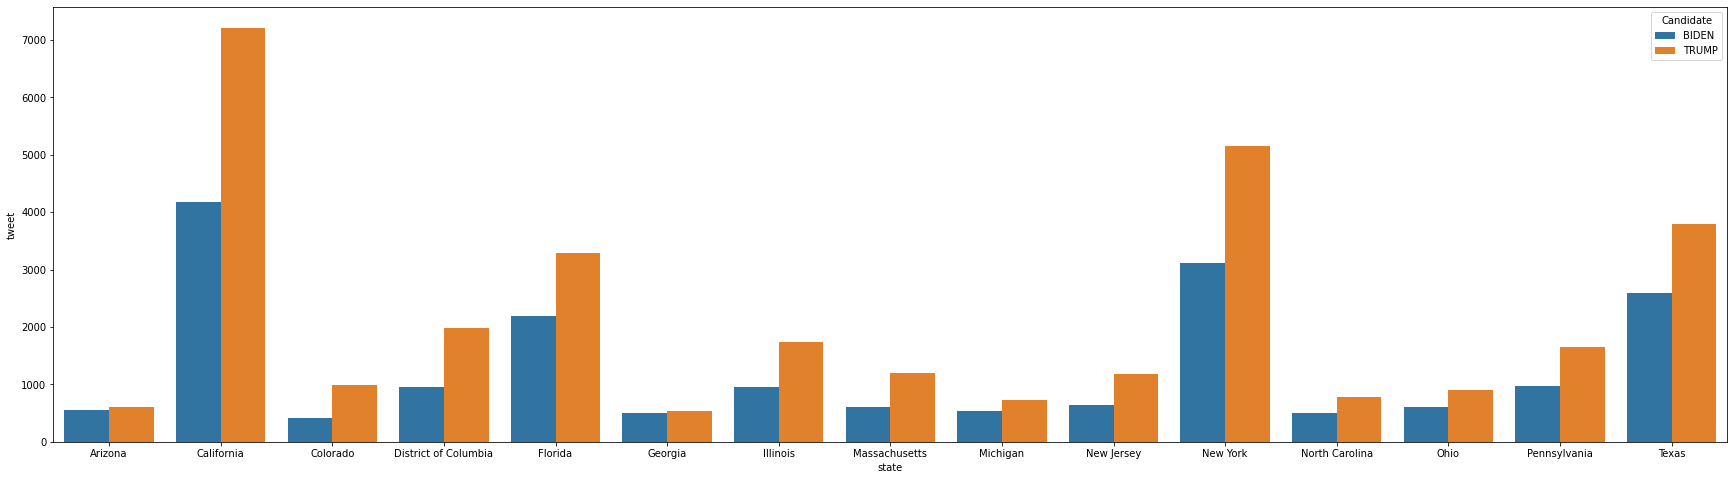

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns

## Negative Sentiment Tweets Candidate Wise
top20States = df.groupby('state')['tweet'].count().sort_values(ascending=False).head(20).index.tolist()
X = df[df['Country'] == 'US'][df['classification'] == 'negative'].groupby(['state','Candidate','classification'])['tweet'].count().reset_index()
X = X[X['state'].isin(top20States)]
plt.figure(figsize=(30,8))
sns.barplot(data=X,x='state',y='tweet',hue='Candidate')
plt.show()

<command-4047411038825831>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 X = df[df['Country'] == 'US'][df['classification'] == 'positive'].groupby(['state','Candidate','classification'])['tweet'].count().reset_index()

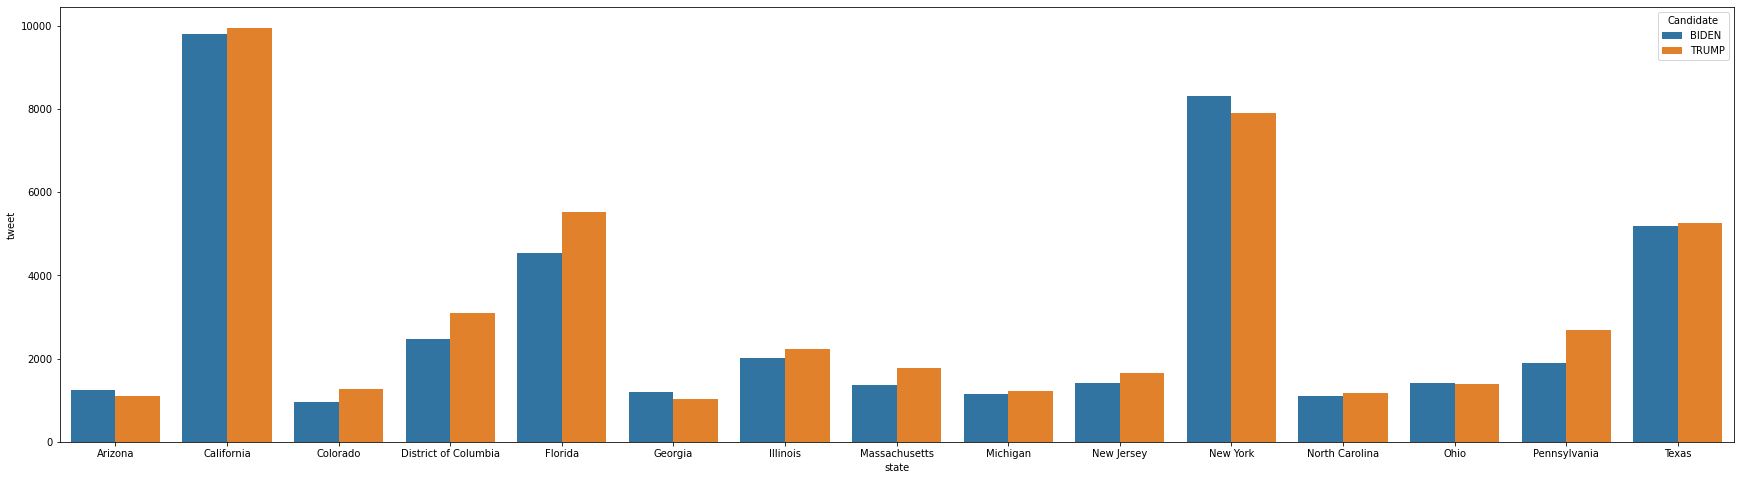

In [0]:
## Positive Sentiment Tweets for Candidates States Wise
X = df[df['Country'] == 'US'][df['classification'] == 'positive'].groupby(['state','Candidate','classification'])['tweet'].count().reset_index()
X = X[X['state'].isin(top20States)]
plt.figure(figsize=(30,8))
sns.barplot(data=X,x='state',y='tweet',hue='Candidate')
plt.show()

<command-4047411038825832>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
 X = df[df['Country'] == 'US'][df['classification'] == 'neutral'].groupby(['state','Candidate','classification'])['tweet'].count().reset_index()

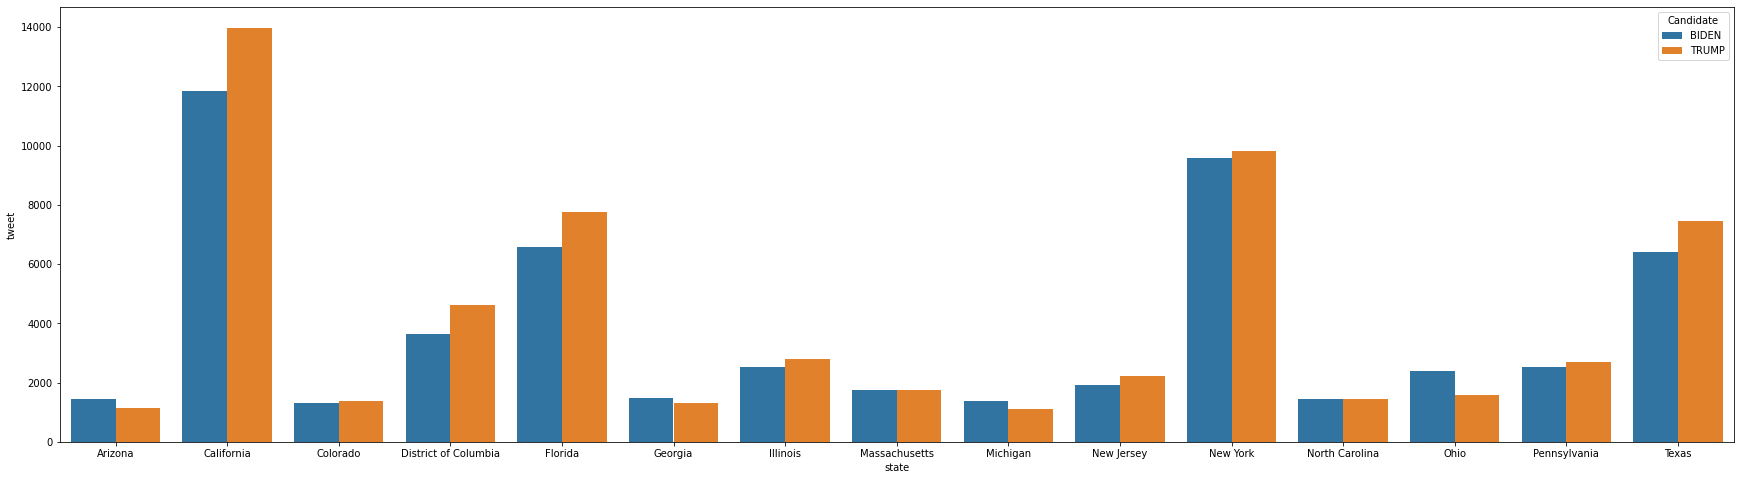

In [0]:
## Netural Sentiment Tweets for Candidates States Wise
X = df[df['Country'] == 'US'][df['classification'] == 'neutral'].groupby(['state','Candidate','classification'])['tweet'].count().reset_index()
X = X[X['state'].isin(top20States)]
plt.figure(figsize=(30,8))
sns.barplot(data=X,x='state',y='tweet',hue='Candidate')
plt.show()